In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("loan.csv")

In [76]:
#segregating data into seperate data frames for fully paid and charged off 
lending_data = pd.read_csv("loan.csv" , index_col = [0,1])
charged_off = lending_data[(lending_data["loan_status"] == 'Charged Off')]
fully_paid = lending_data[(lending_data["loan_status"] == 'Fully Paid')]

In [5]:
#look at loan head
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
#look at structure of the load file
print(df.shape)

(39717, 111)


In [7]:
#filter out all the Current Applicant
df=df[~(df['loan_status'] =='Current')]

In [8]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [9]:
#structure after removing the current applicant
df.shape

(38577, 111)

### Data Preparation

In [10]:
#remove % from the int_rate column

In [11]:
def Clean_data(val):
    return float(val.replace("%",""))

In [12]:
df['int_rate'] = df['int_rate'].apply(Clean_data)

In [13]:
df['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

In [14]:
# remove + sing from emp_lenght column

In [15]:
df['emp_length'] = df['emp_length'].str.replace('+','')

In [16]:
df['emp_length'].head()

0    10 years
1    < 1 year
2    10 years
3    10 years
5     3 years
Name: emp_length, dtype: object

In [17]:
# remove column not required
# pymnt_plan , id , url , zip_code

In [18]:
df.drop(['pymnt_plan' , 'id', 'url', 'zip_code','member_id'], axis = 1, inplace = True)

In [176]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10 years,RENT,24000.0,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,bike,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10 years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,NaN,small_business,real estate business,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10 years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,personel,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,NaN,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,NaN,NaN,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.0

In [19]:
df.shape

(38577, 106)

### Missing Value Steps:

In [20]:
print(df.isnull().sum())

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
                              ...  
tax_liens                        39
tot_hi_cred_lim               38577
total_bal_ex_mort             38577
total_bc_limit                38577
total_il_high_credit_limit    38577
Length: 106, dtype: int64


##### We can observe that emp_title , emp_lenght , desc , title , last_deling , last_record , revol_util , last_paymnt_d  and many more columns has missing value.
##### We need to take care of that.

In [21]:
#showing the percentage of missing values:
round((df.isnull().sum()/len(df.index))*100,2)

loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
term                            0.0
int_rate                        0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 106, dtype: float64

In [180]:
##first Remove the columns having 100% missing values:

In [22]:
df.drop(['mths_since_last_major_derog','annual_inc_joint','dti_joint','verification_status_joint','tot_coll_amt',
         'tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il',
         'il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi',
          'total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy',
           'bc_util','delinq_amnt','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl',
           'mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq',
            'mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_bc_sats','num_bc_tl',
            'num_actv_rev_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0',
            'num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq',
             'percent_bc_gt_75', 'tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit'
             ,'next_pymnt_d'],axis =1 , 
              inplace = True)

In [182]:
## check the missing count after removing 100%
round((df.isnull().sum()/len(df.index))*100,2)

loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.68
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
desc                          32.47
purpose                        0.00
title                          0.03
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths                 0.00
mths_since_last_delinq        64.56
mths_since_last_record        92.90
open_acc                       0.00
pub_rec                        0.00
revol_bal                   

In [23]:
#remove all the columns which has more than 30% missing values
df.drop(['desc','mths_since_last_delinq','mths_since_last_record'], axis =1 , inplace = True)

In [24]:
##check the final missing value count
round((df.isnull().sum()/len(df.index))*100,2)

loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.68
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
purpose                       0.00
title                         0.03
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec                       0.00
revol_bal                     0.00
revol_util                    0.13
total_acc                     0.00
initial_list_status           0.00
out_prncp           

#### EDA Steps:

In [25]:
### During the EDA process we need to identified 5 variables which has effect on the Lending Process

In [26]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10 years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0.0,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0.0,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10 years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0.0,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10 years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0.0,0.0
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0.0,0.0


In [27]:
df.shape

(38577, 47)

In [28]:
## Create two data set one for fully paid another for charged off
## df_fp [Fully Paid]
df_fp = df[df['loan_status']=='Fully Paid']

In [29]:
df_fp.shape

(32950, 47)

In [30]:
##df_chd [charged off]
df_chd = df[df['loan_status']=='Charged Off']

In [31]:
df_chd.shape

(5627, 47)

##### One the most important variable is int_rate

In [32]:
##int_rate is defined as the rate on which consumer has to pay back the amount back to Bank:

In [49]:
print(df['int_rate'].dtype)
print(df['int_rate'].describe())

float64
count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64


In [34]:
### There is no missing value in the int_rate columns
df['int_rate'].isnull().sum()

0

In [47]:
df['int_rate'].head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

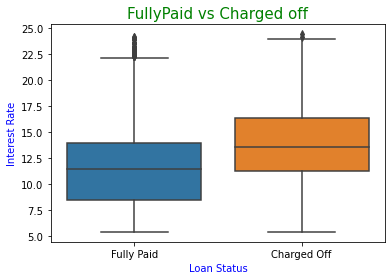

In [36]:
## Analysing data using box plot:
sns.boxplot(x='loan_status', y = 'int_rate' , data = df)
plt.xlabel("Loan Status", fontsize = 10 , color = 'b')
plt.ylabel("Interest Rate", fontsize = 10, color = 'b')
plt.title("FullyPaid vs Charged off", fontsize = 15 , color = 'g')
plt.show()

In [37]:
## Outlier treatment for int_rate
Q1 = df.int_rate.quantile(0.05)
Q3 = df.int_rate.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.int_rate >= Q1 - 1.5*IQR) & (df.int_rate <= Q3 + 1.5*IQR)]

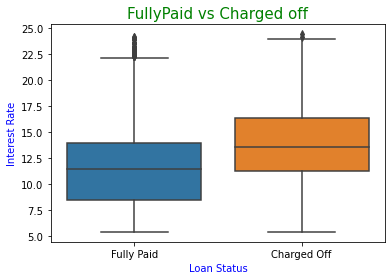

In [38]:
## Analysiing data after removing outliers
sns.boxplot(x='loan_status', y = 'int_rate' , data = df)
plt.xlabel("Loan Status", fontsize = 10 , color = 'b')
plt.ylabel("Interest Rate", fontsize = 10, color = 'b')
plt.title("FullyPaid vs Charged off", fontsize = 15 , color = 'g')
plt.show()

##### We can observe that the customer having high rate of interest are move prone towards the charged off case.

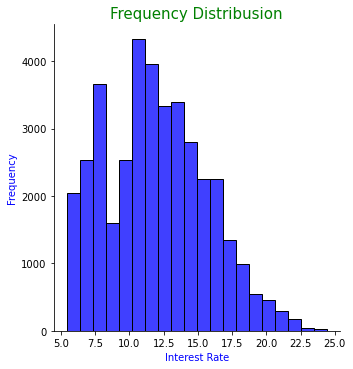

In [39]:
## Analysing data using displot 
sns.displot(df['int_rate'], bins = 20 , color = 'b')
plt.xlabel("Interest Rate", fontsize = 10 , color = 'b')
plt.ylabel("Frequency", fontsize = 10, color = 'b')
plt.title("Frequency Distribusion", fontsize = 15 , color = 'g')
plt.show()

#### Using displot we can observer that Most frequest rate of interest is between 10-11 %

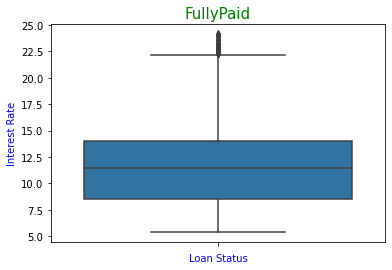

In [40]:
## Segmented Analysis on Fully paid customer
sns.boxplot(y = df_fp['int_rate'])
plt.xlabel("Loan Status", fontsize = 10 , color = 'b')
plt.ylabel("Interest Rate", fontsize = 10, color = 'b')
plt.title("FullyPaid", fontsize = 15 , color = 'g')
plt.show()

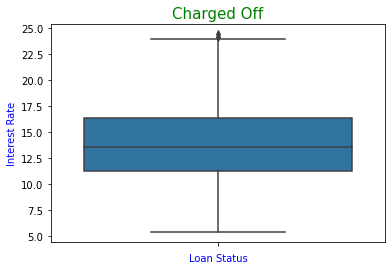

In [41]:
## Segmented Analysis on charged off customer
sns.boxplot(y = df_chd['int_rate'])
plt.xlabel("Loan Status", fontsize = 10 , color = 'b')
plt.ylabel("Interest Rate", fontsize = 10, color = 'b')
plt.title("Charged Off", fontsize = 15 , color = 'g')
plt.show()

#### As per the Segment Wise Analysis we can observe that chaged off customer are more prone to make fraud at 13% and above 
#### rate of interest.

In [42]:
### Second Variable is emp_length
### emp_lenght means total number of working experience of the employee.

In [43]:
df_emp_lenght = df.groupby(['loan_status','emp_length']).size().reset_index(name = "Count")

#### Below Data is showing total number of experice for both the loan category.

In [44]:
## below is showing the count of each category
df_emp_lenght

,loan_status,emp_length,Count
0,Charged Off,1 year,456
1,Charged Off,10 years,1331
2,Charged Off,2 years,567
3,Charged Off,3 years,555
4,Charged Off,4 years,462
5,Charged Off,5 years,458
6,Charged Off,6 years,307
7,Charged Off,7 years,263
8,Charged Off,8 years,203
9,Charged Off,9 years,158


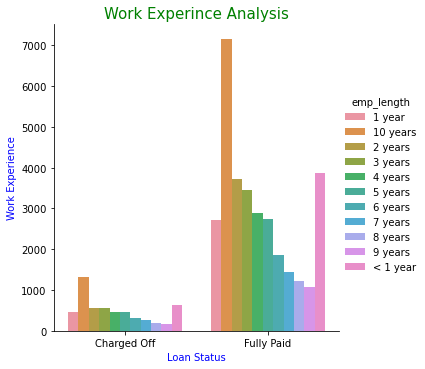

In [45]:
## Analysing data using cat plot
sns.catplot(x='loan_status', y='Count',hue = 'emp_length', kind = 'bar', data= df_emp_lenght)
plt.xlabel("Loan Status", fontsize = 10 , color = 'b')
plt.ylabel("Work Experience", fontsize = 10, color = 'b')
plt.title("Work Experince Analysis", fontsize = 15 , color = 'g')
plt.show()

#### As per the above graph we can analyse that cusomer having expericne greater than 10 years are more likely to make the fraud.

In [50]:
## Third Variable is Home_ownership
## Home_ownership means residential status of the employee : Rent owner etc:

In [51]:
df_emp_home_ownership = df.groupby(['loan_status','home_ownership']).size().reset_index(name = "Count")

In [52]:
df_emp_home_ownership

,loan_status,home_ownership,Count
0,Charged Off,MORTGAGE,2327
1,Charged Off,OTHER,18
2,Charged Off,OWN,443
3,Charged Off,RENT,2839
4,Fully Paid,MORTGAGE,14694
5,Fully Paid,NONE,3
6,Fully Paid,OTHER,80
7,Fully Paid,OWN,2532
8,Fully Paid,RENT,15641


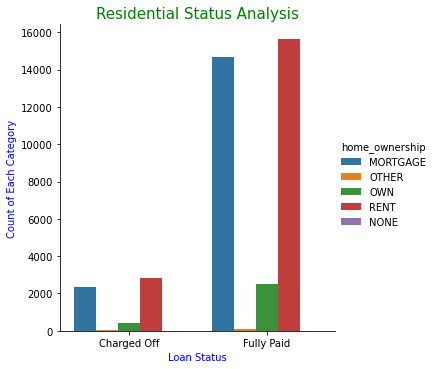

In [53]:
sns.catplot(x='loan_status', y='Count',hue = 'home_ownership', kind = 'bar', data= df_emp_home_ownership)
plt.xlabel("Loan Status", fontsize = 10 , color = 'b')
plt.ylabel("Count of Each Category", fontsize = 10, color = 'b')
plt.title("Residential Status Analysis", fontsize = 15 , color = 'g')
plt.show()

#### As per the above graph we can observe that customer live on rent are more prone towards fraud.

In [54]:
## dti means
## dti means A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations

In [55]:
## checking missing value
df['dti'].isnull().sum()

0

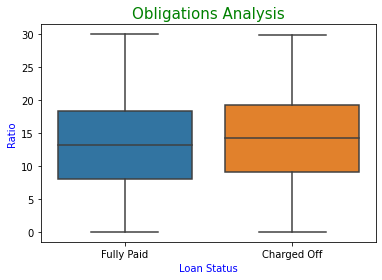

In [56]:
#checking outliers:
sns.boxplot(x='loan_status', y = 'dti' , data = df)
plt.xlabel("Loan Status", fontsize = 10 , color = 'b')
plt.ylabel("Ratio", fontsize = 10, color = 'b')
plt.title("Obligations Analysis", fontsize = 15 , color = 'g')
plt.show()

In [ ]:
sns.boxplot(x='loan_status', y = 'dti' , data = df)
plt.xlabel("Loan Status", fontsize = 10 , color = 'b')
plt.ylabel("Ratio", fontsize = 10, color = 'b')
plt.title("Obligations Analysis", fontsize = 15 , color = 'g')
plt.show()

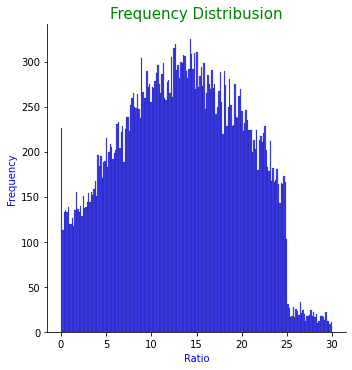

In [70]:
## Analysing data using displot 
sns.displot(df['dti'], bins = 200, color = 'b')
plt.xlabel("Ratio", fontsize = 10 , color = 'b')
plt.ylabel("Frequency", fontsize = 10, color = 'b')
plt.title("Frequency Distribusion", fontsize = 15 , color = 'g')
plt.show()

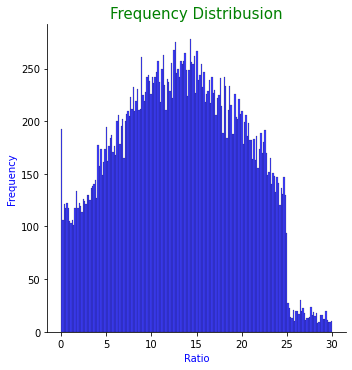

In [74]:
#Frequency distribution for fully paid customer wrt dti
sns.displot(fully_paid['dti'], bins = 200, color = 'b')
plt.xlabel("Ratio", fontsize = 10 , color = 'b')
plt.ylabel("Frequency", fontsize = 10, color = 'b')
plt.title("Frequency Distribusion", fontsize = 15 , color = 'g')
plt.show()

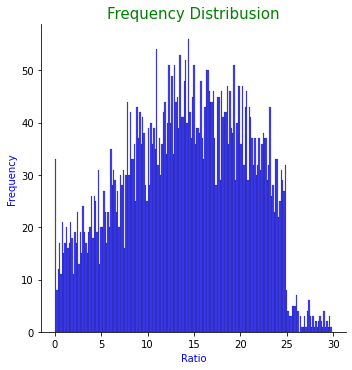

In [75]:
#Frequency distribution for charged off customer wrt dti
sns.displot(charged_off['dti'], bins = 200, color = 'b')
plt.xlabel("Ratio", fontsize = 10 , color = 'b')
plt.ylabel("Frequency", fontsize = 10, color = 'b')
plt.title("Frequency Distribusion", fontsize = 15 , color = 'g')
plt.show()

#### We can observer that obligation ratio is of 15%

In [59]:
## last variable is inq_last_6mths
## inq_last_6mths number of queries in last 6 Months held by the financial institutes

In [65]:
## checking missing values
df['inq_last_6mths'].isnull().sum()

0

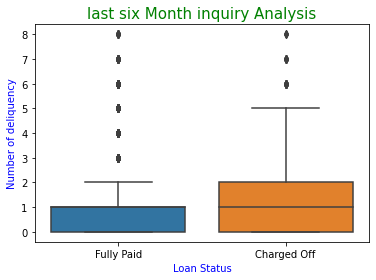

In [66]:
sns.boxplot(x='loan_status', y = 'inq_last_6mths' , data = df)
plt.xlabel("Loan Status", fontsize = 10 , color = 'b')
plt.ylabel("Number of deliquency", fontsize = 10, color = 'b')
plt.title("last six Month inquiry Analysis", fontsize = 15 , color = 'g')
plt.show()

In [67]:
##Removing outliers:
Q1 = df['inq_last_6mths'].quantile(0.05)
Q3 = df['inq_last_6mths'].quantile(0.95)
IQR = Q3 - Q1
df = df[(df['inq_last_6mths'] >= Q1 - 1.5*IQR) & (df['inq_last_6mths'] <= Q3 + 1.5*IQR)]

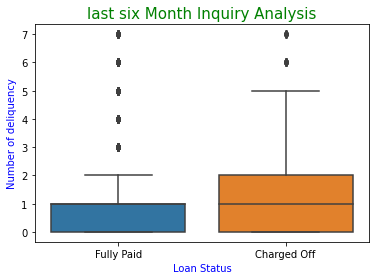

In [68]:
## Analysing data after removing outliers:
sns.boxplot(x='loan_status', y = 'inq_last_6mths' , data = df)
plt.xlabel("Loan Status", fontsize = 10 , color = 'b')
plt.ylabel("Number of deliquency", fontsize = 10, color = 'b')
plt.title("last six Month Inquiry Analysis", fontsize = 15 , color = 'g')
plt.show()

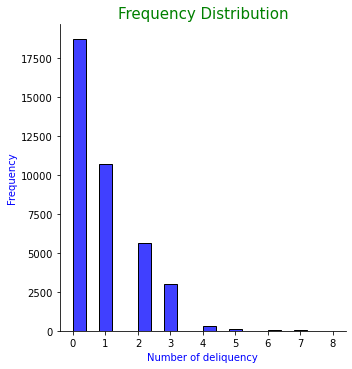

In [64]:
## Analysing data using displot 
sns.displot(df['inq_last_6mths'], bins = 20 , color = 'b')
plt.xlabel("Number of deliquency", fontsize = 10 , color = 'b')
plt.ylabel("Frequency", fontsize = 10, color = 'b')
plt.title("Frequency Distribution", fontsize = 15 , color = 'g')
plt.show()

#### We can clearly observed that customer having inquiry in recent months are very prone to commit fraud